In [1]:
import torch
a = torch.ones(3)

In [2]:
print(a.shape)
print(a)

torch.Size([3])
tensor([1., 1., 1.])


In [3]:
float(a[1])

1.0

In [5]:
points = torch.tensor([4.0, 1.0, 5.0, 3.0, 2.0, 1.0])
points.shape

torch.Size([6])

In [6]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0]])
points

tensor([[4., 1.],
        [5., 3.]])

In [7]:
points[None].shape

torch.Size([1, 2, 2])

In [8]:
points.shape

torch.Size([2, 2])

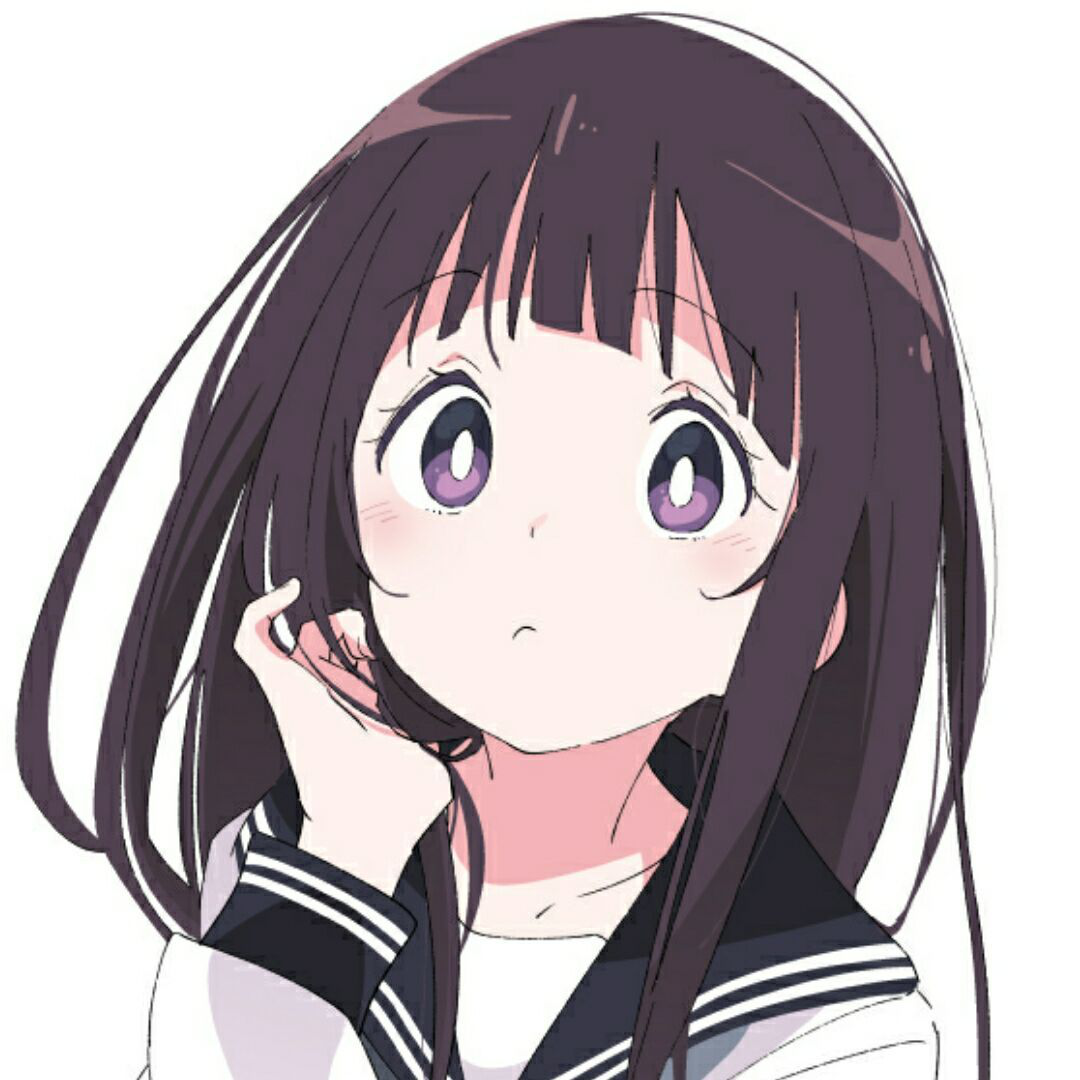

In [9]:
from PIL import Image
img = Image.open(r'C:\Users\wolf\Desktop\临时图片\人物图片\1.jpg')
img

In [16]:
from torchvision import transforms
preprocess = transforms.Compose([transforms.Resize(256), transforms.ToTensor()])

In [17]:
img_t = preprocess(img)

In [25]:
img_t.shape

torch.Size([3, 256, 256])

In [28]:
img_named = img_t.refine_names(..., 'channels', 'rows', 'cols')
img_named.shape

torch.Size([3, 256, 256])

In [29]:
weights_named = torch.tensor([0.1, 0.4, 0.5], names=['channels'])
weights_named.shape

torch.Size([3])

In [34]:
weights_aligned = weights_named.align_as(img_named)
weights_aligned.shape

torch.Size([3, 1, 1])

In [33]:
gray_named = (img_named*weights_aligned).sum('channels')
gray_named.shape

torch.Size([256, 256])

In [35]:
double_points = torch.ones(10, 2, dtype=torch.double)
double_points.dtype

torch.float64

In [37]:
double_points = torch.zeros(10, 2).double()
double_points.dtype

torch.float64

In [38]:
points_64 = torch.rand(1, 2, dtype=torch.double)
points_short = points_64.to(torch.short)
(points_64 * points_short).shape

torch.Size([1, 2])

In [39]:
print(points_64.dtype)
print(points_short.dtype)

torch.float64
torch.int16


In [7]:
# 张量的API
import torch
a = torch.ones(1, 5)
a_t = torch.transpose(a, 1, 0)
a_t.transpose(1, 0)
a_t.shape

torch.Size([5, 1])

In [9]:
points = torch.tensor([[1, 2, 3], [4, 5, 6]])
points.storage()

C:\Users\wolf\AppData\Local\Temp\ipykernel_20240\1171031755.py:2: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  points.storage()
d:\Anaconda\envs\pytorch\lib\site-packages\IPython\lib\pretty.py:778: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  output = repr(obj)
d:\Anaconda\envs\pytorch\lib\site-packages\torch\storage.py:645: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directl

 1
 2
 3
 4
 5
 6
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 6]

In [12]:
row = 1
col = 1
idx = row*3 + col
points.storage()[idx]

C:\Users\wolf\AppData\Local\Temp\ipykernel_20240\747236792.py:4: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  points.storage()[idx]


5

In [13]:
points.storage()[idx] = 50
points.storage()

C:\Users\wolf\AppData\Local\Temp\ipykernel_20240\3678991123.py:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  points.storage()[idx] = 50
C:\Users\wolf\AppData\Local\Temp\ipykernel_20240\3678991123.py:2: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  points.storage()
d:\Anaconda\envs\pytorch\lib\site-packages\IPython\lib\pretty.py:778: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storage

 1
 2
 3
 4
 50
 6
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 6]

In [23]:
points = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
first_point = points[2]
first_point.storage_offset()
points.stride()

(3, 1)

In [25]:
# 可以克隆子张量
points = torch.tensor([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
first_point = points[0].clone()
first_point[1] = 3
first_point

tensor([1, 3, 1])

In [26]:
# 3.9 张量与GPU
points_gpu = torch.tensor([1, 2, 3], device='cuda:0')
points_cpu = points_gpu.to(device='cpu')

In [32]:
points = torch.ones(3, 4)
points_np =points.numpy()
points_np

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)

In [31]:
points = torch.from_numpy(points_np)
points.dtype

torch.float32

In [35]:
import numpy as np
points_np = np.array([[1, 2, 3], [4, 5, 6]], dtype=np.float32)
points_np.dtype

dtype('float32')

In [37]:
# 保存张量
points = torch.ones(3, 4)
torch.save(points, './ourpoints.t')

# with open(<name>, <mode>) as f:
#   torch.save(p, f)

In [38]:
points_l = torch.load('./ourpoints.t')
points_l
# with open(<name>, <mode>) as f:
#   _ = torch.load(f)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [40]:
# 使用HDF5格式和h5py库
import h5py
points = torch.tensor([[1, 2, 3], [4, 5, 6]])
f = h5py.File('./h5File.hdf5', 'w')
dset = f.create_dataset('coords', data=points.numpy())
f.close()

In [45]:
f = h5py.File('./h5File.hdf5', 'r')
dset = f['coords']
last_points = dset[1, -2:]
last_points

array([5, 6], dtype=int64)

In [48]:
# 练习题
a = torch.tensor(list(range(9)))
print(a.size(), a.stride(), a.storage_offset())

torch.Size([9]) (1,) 0


In [53]:
b = a.view(3, 3)

In [54]:
c = b[1:, 1:]
c

tensor([[40,  5],
        [ 7,  8]])

In [55]:
c.size(), c.stride(), c.storage_offset()

(torch.Size([2, 2]), (3, 1), 4)

In [62]:
a = torch.tensor(list(range(9)))
print(a)
a = torch.cos(a)
a

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])


tensor([ 1.0000,  0.5403, -0.4161, -0.9900, -0.6536,  0.2837,  0.9602,  0.7539,
        -0.1455])

In [65]:
b = torch.ones(5, 5)
b = torch.cos(b)
b

tensor([[0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403]])